In [1]:
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
import pandas as pd
import pynance as pn

In [5]:
app_data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')


In [34]:
app_data['Date'] = pd.to_datetime(app_data['Date'])
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB


RangeIndex(start=0, stop=10998, step=1)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


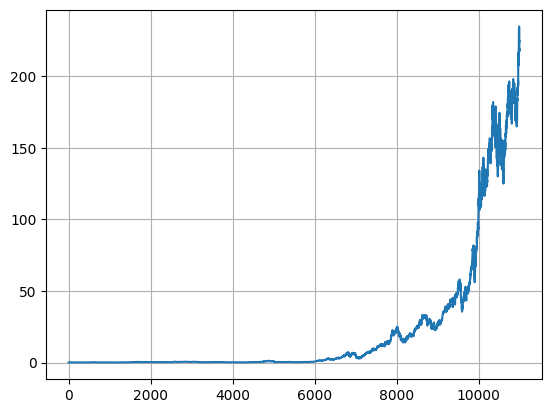

In [ ]:
print(app_data.index)

print(app_data.columns)

ts = app_data['Close'][-10:]

sample = app_data.sample(20)


app_data['Close'].plot(grid=True)

plt.show()

## Calculating RSI, Moving Average and Moving Average Convergence Divergence

In [37]:
# Ensure 'Date' is datetime and set as index if needed
app_data['Date'] = pd.to_datetime(app_data['Date'])
app_data.set_index('Date', inplace=True)

In [38]:
# Calculate Moving Averages
app_data['SMA_20'] = ta.SMA(app_data['Close'], timeperiod=20)
app_data['EMA_20'] = ta.EMA(app_data['Close'], timeperiod=20)
# Calculate RSI
app_data['RSI_14'] = ta.RSI(app_data['Close'], timeperiod=14)

# Calculate MACD
app_data['MACD'], app_data['MACD_signal'], app_data['MACD_hist'] = ta.MACD(
    app_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

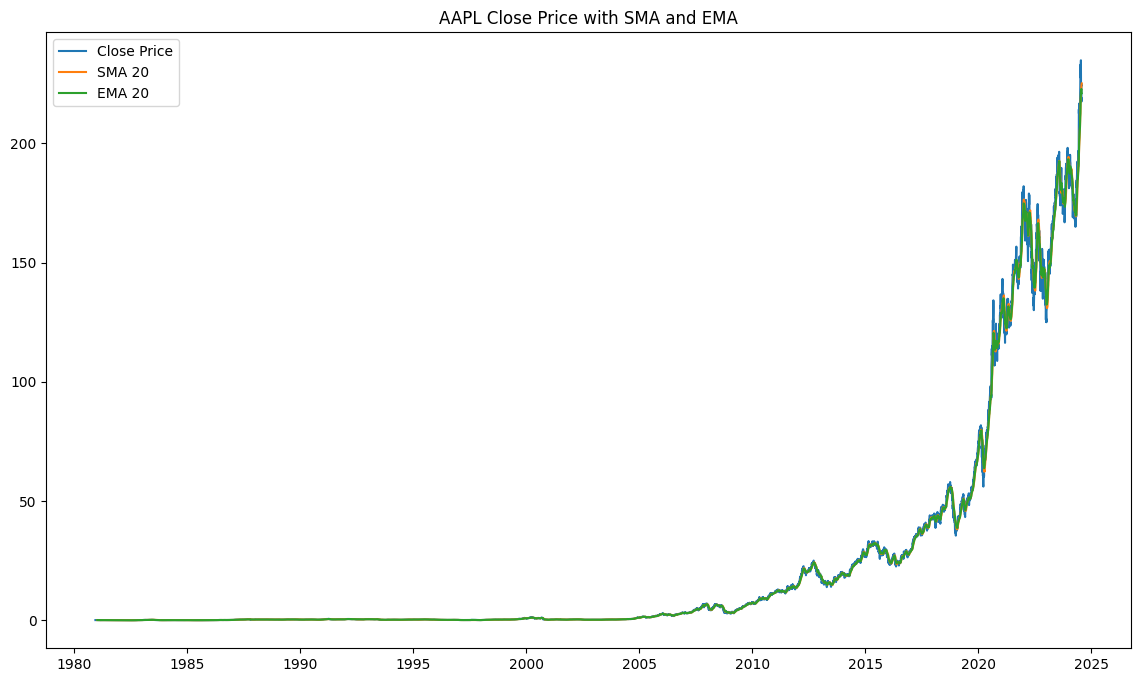

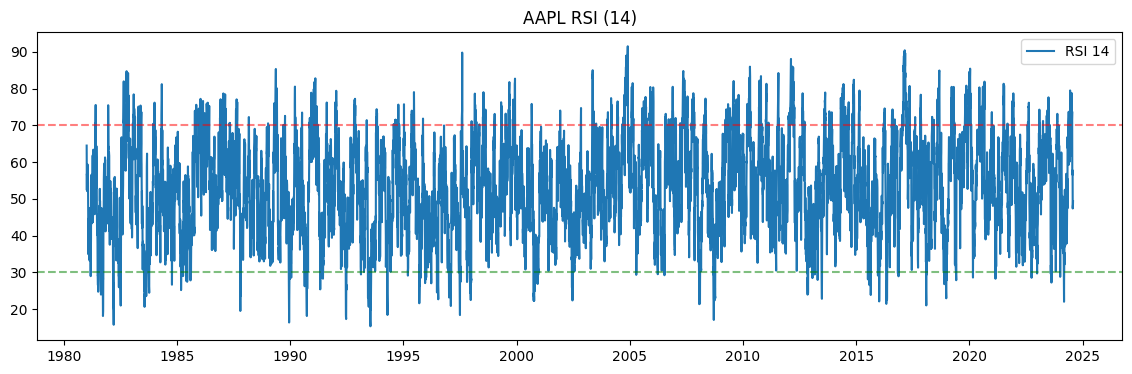

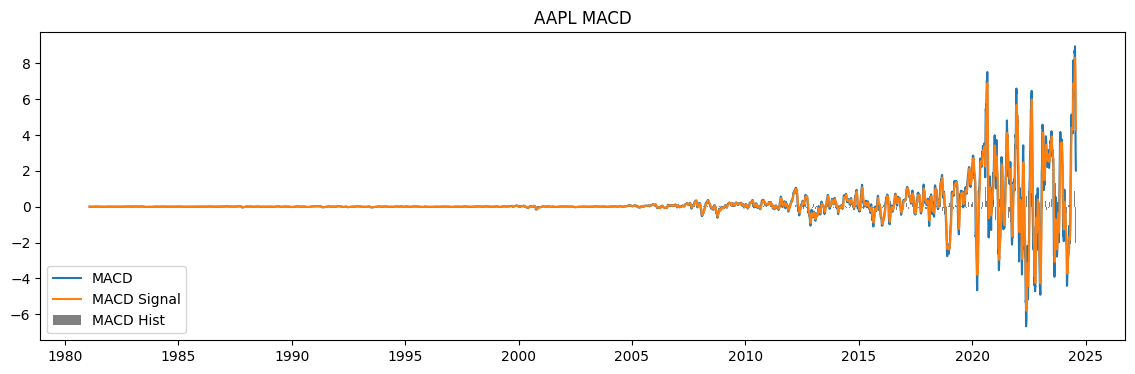

In [39]:
plt.figure(figsize=(14, 8))
plt.plot(app_data.index, app_data['Close'], label='Close Price')
plt.plot(app_data.index, app_data['SMA_20'], label='SMA 20')
plt.plot(app_data.index, app_data['EMA_20'], label='EMA 20')
plt.title('AAPL Close Price with SMA and EMA')
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(app_data.index, app_data['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('AAPL RSI (14)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(app_data.index, app_data['MACD'], label='MACD')
plt.plot(app_data.index, app_data['MACD_signal'], label='MACD Signal')
plt.bar(app_data.index, app_data['MACD_hist'], label='MACD Hist', color='gray')
plt.title('AAPL MACD')
plt.legend()
plt.show()

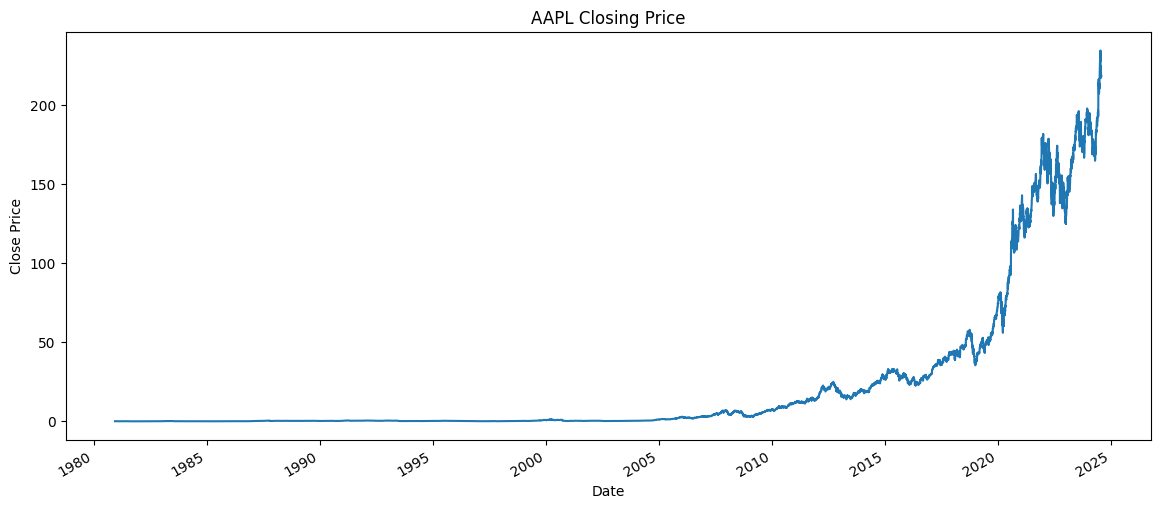

In [24]:
app_data['Close'].plot(figsize=(14,6), title='AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

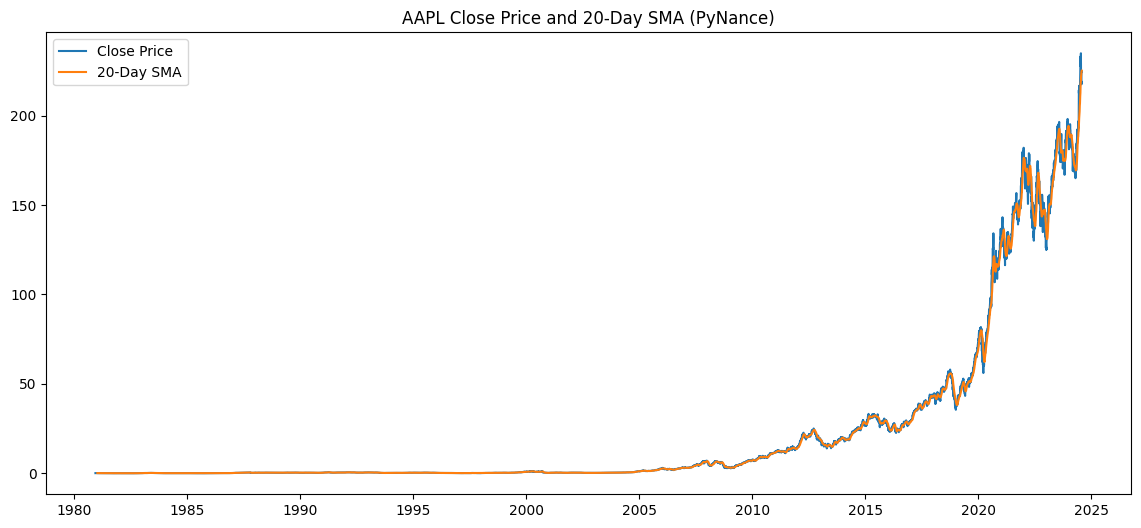

In [25]:
app_data['SMA_20'] = app_data['Close'].rolling(window=20).mean()
plt.figure(figsize=(14, 6))
plt.plot(app_data.index, app_data['Close'], label='Close Price')
plt.plot(app_data.index, app_data['SMA_20'], label='20-Day SMA')
plt.title('AAPL Close Price and 20-Day SMA (PyNance)')
plt.legend()
plt.show()

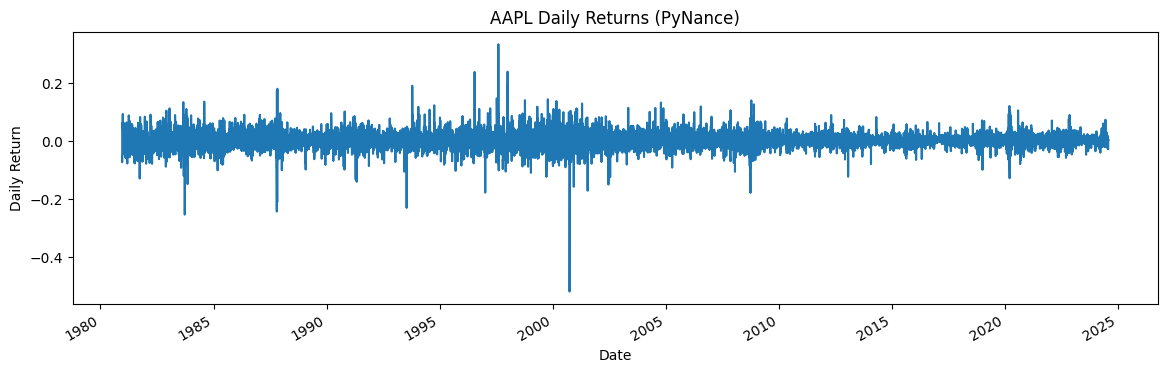

In [26]:
# Calculate daily returns and plot
app_data['daily_return'] = app_data['Close'].pct_change()
app_data['daily_return'].plot(figsize=(14, 4), title='AAPL Daily Returns (PyNance)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

In [41]:
# Assign `Adj Close` to `daily_close`
daily_close = app_data[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
1980-12-12   0.000000
1980-12-15  -0.052171
1980-12-16  -0.073398
1980-12-17   0.024751
1980-12-18   0.028992
...               ...
2024-07-24  -0.028754
2024-07-25  -0.004805
2024-07-26   0.002161
2024-07-29   0.001285
2024-07-30   0.002566

[10998 rows x 1 columns]
            Adj Close
Date                 
1980-12-12        NaN
1980-12-15  -0.053581
1980-12-16  -0.076231
1980-12-17   0.024449
1980-12-18   0.028580
...               ...
2024-07-24  -0.029176
2024-07-25  -0.004816
2024-07-26   0.002159
2024-07-29   0.001284
2024-07-30   0.002563

[10998 rows x 1 columns]


In [44]:
# Resample `aapl` to business months, take last observation as value 
monthly = app_data.resample('BME').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = app_data.resample("4ME").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

/tmp/ipykernel_72795/2543487281.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly = app_data.resample('BME').apply(lambda x: x[-1])


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,,
1980-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-04-30,-0.094185,-0.094089,-0.095811,-0.095811,-0.095811,-0.747477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-08-31,-0.033490,-0.033142,-0.033520,-0.033520,-0.033520,0.241629,NaN,NaN,-0.011328,-0.012463,-0.048582,-0.470790,-0.654432,-17.888259
1981-12-31,-0.289871,-0.288971,-0.289884,-0.289884,-0.289884,0.186656,NaN,NaN,-0.310924,-0.303168,0.036562,0.099055,1.205643,-2.048514
1982-04-30,-0.055217,-0.055726,-0.056022,-0.056022,-0.056022,0.384146,NaN,NaN,-0.021512,-0.031861,-0.104113,-0.095218,-0.456360,-1.569564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,0.037695,0.036328,0.045797,0.042774,0.044825,-0.260899,0.037037,NaN,-0.008251,-0.002387,0.332839,-1.972190,-1.981768,-1.929756
2023-08-31,0.206826,0.201202,0.207676,0.202303,0.204646,-0.121052,0.965622,NaN,0.221832,0.216188,0.002650,0.011977,0.381526,-1.716827
2023-12-31,0.001787,0.001928,0.001536,0.002550,0.004377,-0.010061,-0.481928,NaN,0.002407,0.006408,-0.077927,-0.618024,-0.769814,-1.986574


In [45]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
1980-12-12        NaN
1980-12-15  -0.052171
1980-12-16  -0.073398
1980-12-17   0.024751
1980-12-18   0.028992
...               ...
2024-07-24  -0.028754
2024-07-25  -0.004805
2024-07-26   0.002161
2024-07-29   0.001285
2024-07-30   0.002566

[10998 rows x 1 columns]


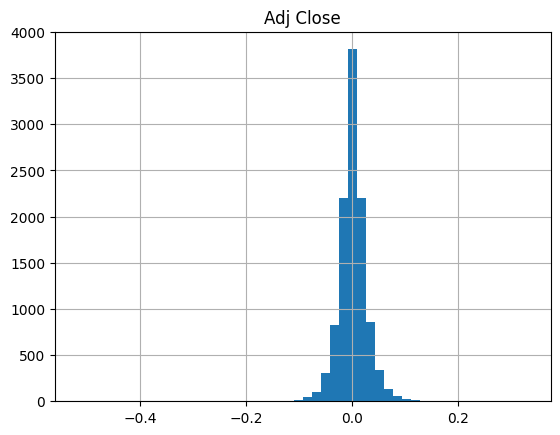

          Adj Close
count  10997.000000
mean       0.001096
std        0.027892
min       -0.518692
25%       -0.012674
50%        0.000000
75%        0.014451
max        0.332281


In [46]:
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [47]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

              Adj Close
Date                   
1980-12-12          NaN
1980-12-15     0.947829
1980-12-16     0.878261
1980-12-17     0.899999
1980-12-18     0.926091
...                 ...
2024-07-24  2206.187813
2024-07-25  2195.588126
2024-07-26  2200.332786
2024-07-29  2203.159441
2024-07-30  2208.812751

[10998 rows x 1 columns]


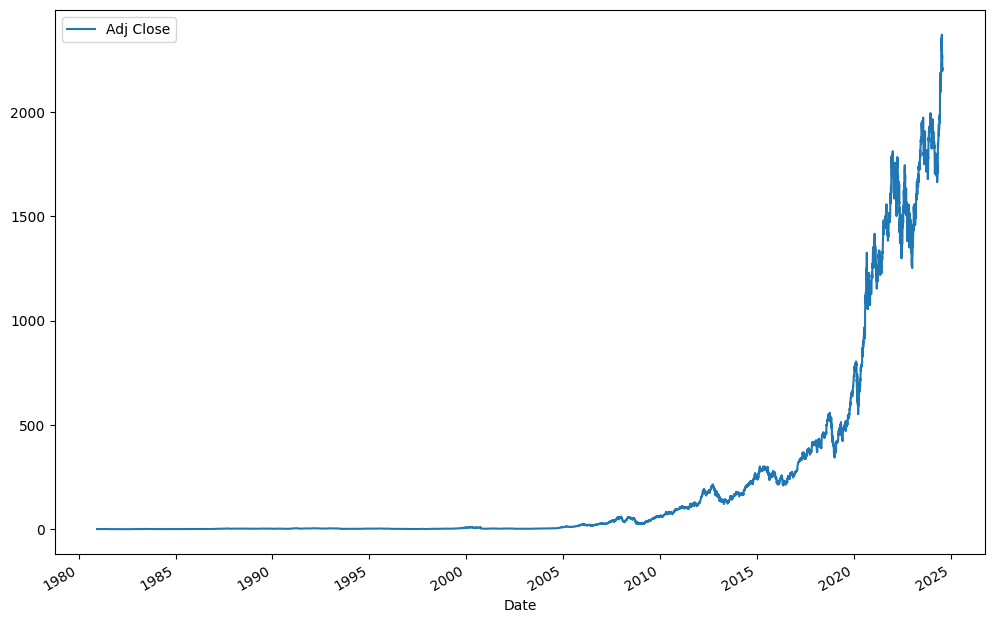

In [48]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

news_data = pd.read_csv('../data/raw_analyst_ratings.csv')

scores = [vader.polarity_scores(headline) for headline in news_data['headline'].values]

scores_df = pd.DataFrame(scores)

news_data = pd.concat([news_data, scores_df ], axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mikiask/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:

cols = ['neg', 'neu', 'pos', 'compound', 'headline', 'stock', 'publisher', 'date']
news_data['date'] = pd.to_datetime(news_data['date'], format='mixed', utc=True).dt.normalize()
app_data['Date'] = pd.to_datetime(app_data['Date'], format='mixed', utc=True).dt.normalize()
#Aggregate Sentiments: Compute average daily sentiment scores if multiple articles appear on the same day.
daily_sentiment = news_data.loc[news_data['stock']=='AAPL'].groupby('date')[['neg', 'neu', 'pos', 'compound']].mean().reset_index()
#news_data[cols].tail()
daily_sentiment.head()


,date,neg,neu,pos,compound
0,2020-03-09 00:00:00+00:00,0.168667,0.805000,0.026333,-0.302067
1,2020-03-10 00:00:00+00:00,0.124375,0.808125,0.067500,-0.090787
2,2020-03-11 00:00:00+00:00,0.090929,0.819929,0.089143,-0.023850
3,2020-03-12 00:00:00+00:00,0.179400,0.672200,0.148400,-0.078360
4,2020-03-13 00:00:00+00:00,0.085182,0.862455,0.052364,-0.059727


In [ ]:
# Aggregate news data to daily (e.g., mean sentiment per day)
sentiment_cols = ['neg', 'neu', 'pos', 'compound','stock','date']
#daily_sentiment = news_data[sentiment_cols].resample('D').mean()

# Align and join on date
aligned = app_data.set_index('Date').join(daily_sentiment.set_index('date'), how='inner')

print(aligned.tail())

                                Open       High        Low      Close  \
2020-05-29 00:00:00+00:00  79.812500  80.287498  79.117500  79.485001   
2020-06-01 00:00:00+00:00  79.437500  80.587502  79.302498  80.462502   
2020-06-02 00:00:00+00:00  80.187500  80.860001  79.732498  80.834999   
2020-06-09 00:00:00+00:00  83.035004  86.402496  83.002502  85.997498   
2020-06-10 00:00:00+00:00  86.974998  88.692497  86.522499  88.209999   

                           Adj Close     Volume  Dividends  Stock Splits  \
2020-05-29 00:00:00+00:00  77.536530  153532400        0.0           0.0   
2020-06-01 00:00:00+00:00  78.490051   80791200        0.0           0.0   
2020-06-02 00:00:00+00:00  78.853424   87642800        0.0           0.0   
2020-06-09 00:00:00+00:00  83.889359  147712400        0.0           0.0   
2020-06-10 00:00:00+00:00  86.047615  166651600        0.0           0.0   

                                neg       neu       pos  compound  
2020-05-29 00:00:00+00:00  0.348000 

In [49]:
# Calculate daily returns stock
aligned['daily_return'] = aligned['Close'].pct_change() * 100

**Calculate Pearson correlation**

Pearson correlation between daily news sentiment (compound) and stock returns: 0.0441


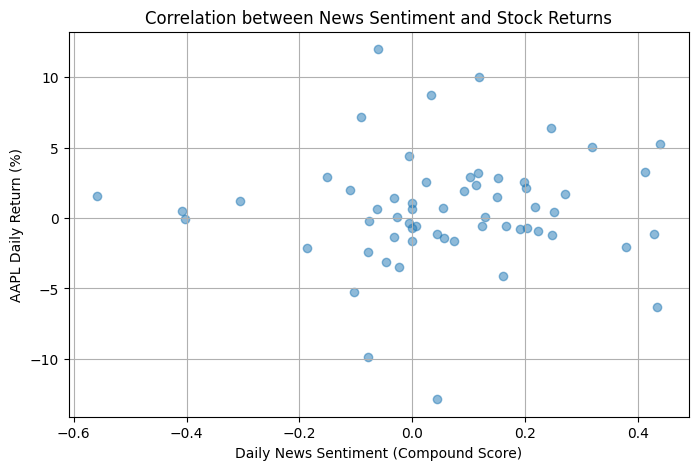

In [50]:
corr_data = aligned[['daily_return', 'compound']].dropna()

# Calculate Pearson correlation
correlation = corr_data['daily_return'].corr(corr_data['compound'])
print(f"Pearson correlation between daily news sentiment (compound) and stock returns: {correlation:.4f}")

# Optional: visualize the relationship
plt.figure(figsize=(8,5))
plt.scatter(corr_data['compound'], corr_data['daily_return'], alpha=0.5)
plt.xlabel('Daily News Sentiment (Compound Score)')
plt.ylabel('AAPL Daily Return (%)')
plt.title('Correlation between News Sentiment and Stock Returns')
plt.grid(True)
plt.show()

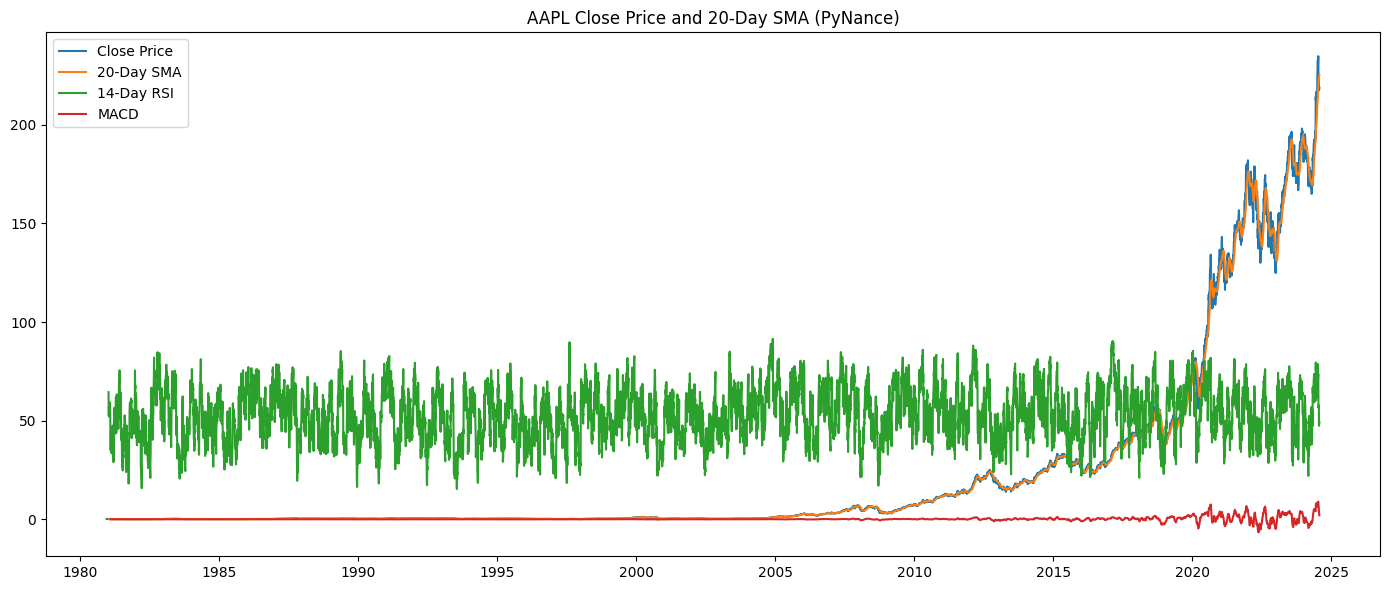

      Unnamed: 0                                           headline  \
6680        7120  Tech Stocks And FAANGS Strong Again To Start D...   
6681        7121      10 Biggest Price Target Changes For Wednesday   
6682        7122  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...   
6683        7123  Deutsche Bank Maintains Buy on Apple, Raises P...   
6684        7124  Apple To Let Users Trade In Their Mac Computer...   

                                                    url          publisher  \
6680  https://www.benzinga.com/government/20/06/1622...         JJ Kinahan   
6681  https://www.benzinga.com/analyst-ratings/price...         Lisa Levin   
6682  https://www.benzinga.com/short-sellers/20/06/1...  Benzinga Newsdesk   
6683  https://www.benzinga.com/news/20/06/16219873/d...  Benzinga Newsdesk   
6684  https://www.benzinga.com/news/20/06/16218697/a...      Neer Varshney   

                          date stock  neg    neu    pos  compound  
6680 2020-06-10 15:33:26+00:00  AAPL

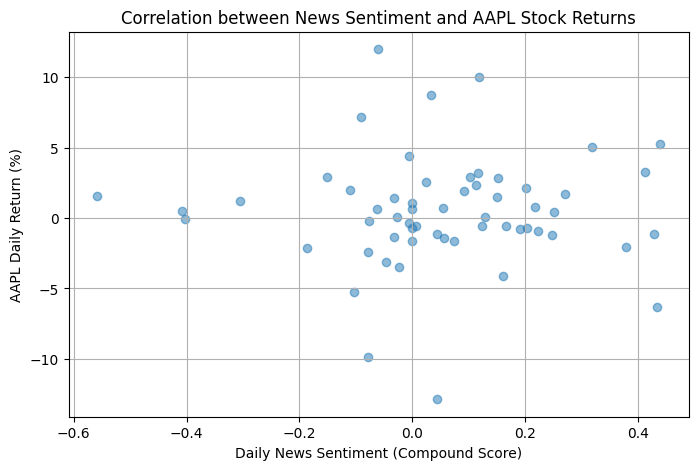

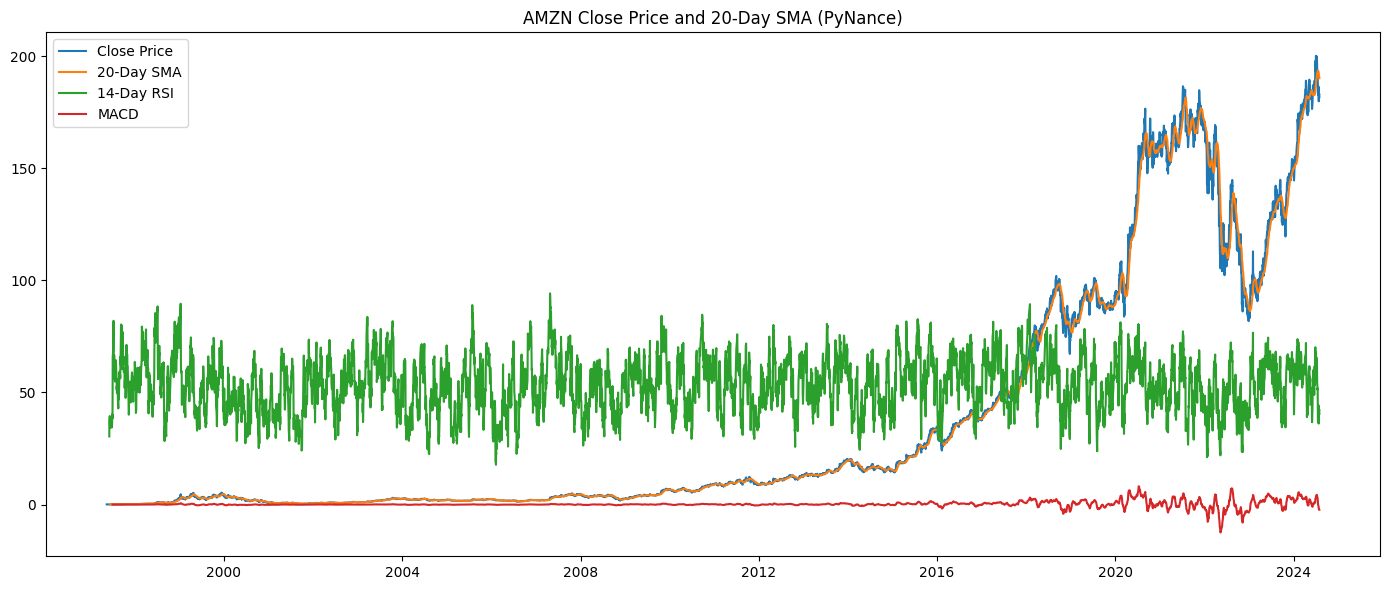

       Unnamed: 0                                           headline  \
76177       76869  How Cannabis Company Cannaphyll Is Marketing O...   
76178       76870  Tech Stocks And FAANGS Strong Again To Start D...   
76179       76871  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...   
76180       76872  Hearing Vertical Group Out Positive On Amazon,...   
76181       76873  Big Tech Reaches New Record Heights At The Sto...   

                                                     url          publisher  \
76177  https://www.benzinga.com/markets/cannabis/20/0...        Jaycee Tenn   
76178  https://www.benzinga.com/government/20/06/1622...         JJ Kinahan   
76179  https://www.benzinga.com/short-sellers/20/06/1...  Benzinga Newsdesk   
76180  https://www.benzinga.com/analyst-ratings/analy...  Benzinga Newsdesk   
76181  https://www.benzinga.com/news/20/06/16218615/b...      Neer Varshney   

                           date stock  neg    neu    pos  compound  
76177 2020-06-10 17:18:

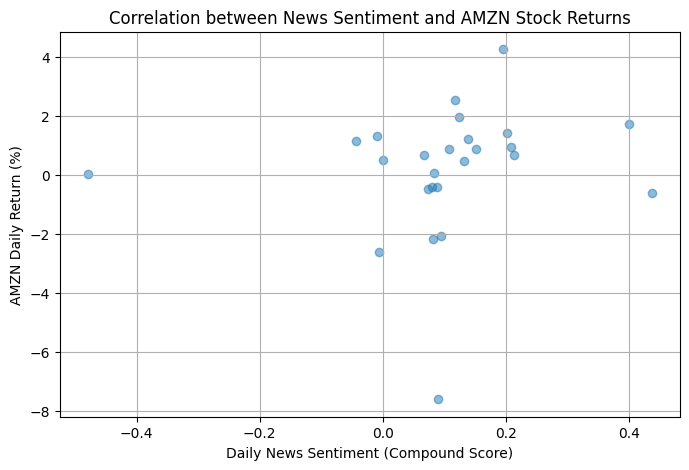

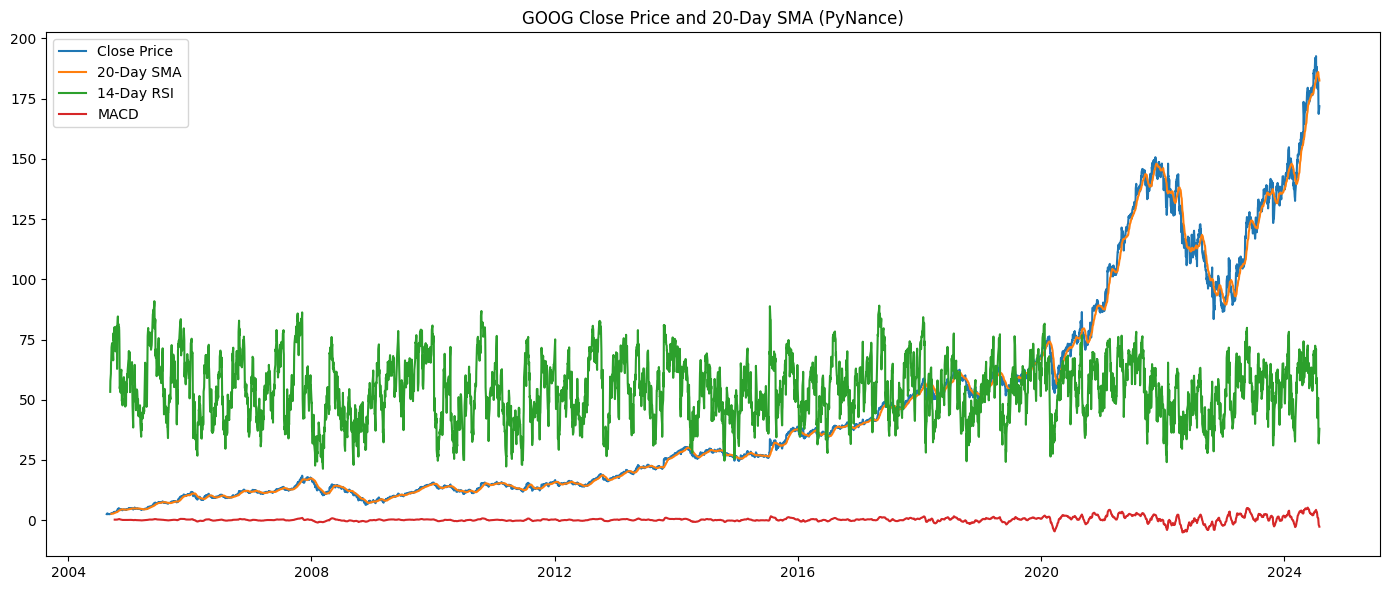

        Unnamed: 0                                           headline  \
565380      568379  Facebook, Snap Analyst Projects Q2 Revenue Ups...   
565381      568380  How Cannabis Company Cannaphyll Is Marketing O...   
565382      568381  Twitter, Square Will Mark Juneteenth As Holida...   
565383      568382             Price Over Earnings Overview: Alphabet   
565384      568383  Google Maps To Offer Relevant Local COVID-19 I...   

                                                      url          publisher  \
565380  https://www.benzinga.com/analyst-ratings/analy...   Shanthi Rexaline   
565381  https://www.benzinga.com/markets/cannabis/20/0...        Jaycee Tenn   
565382  https://www.benzinga.com/news/20/06/16218441/t...  Shivdeep Dhaliwal   
565383  https://www.benzinga.com/intraday-update/20/06...  Benzinga Insights   
565384  https://www.benzinga.com/news/20/06/16208274/g...  Shivdeep Dhaliwal   

                            date stock  neg    neu    pos  compound  
565380 202

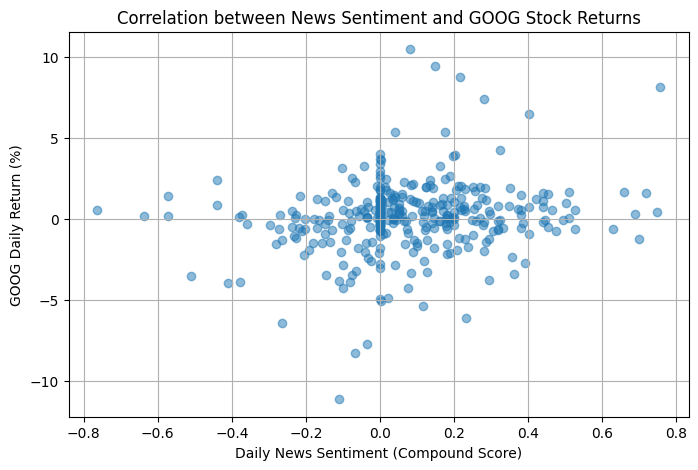

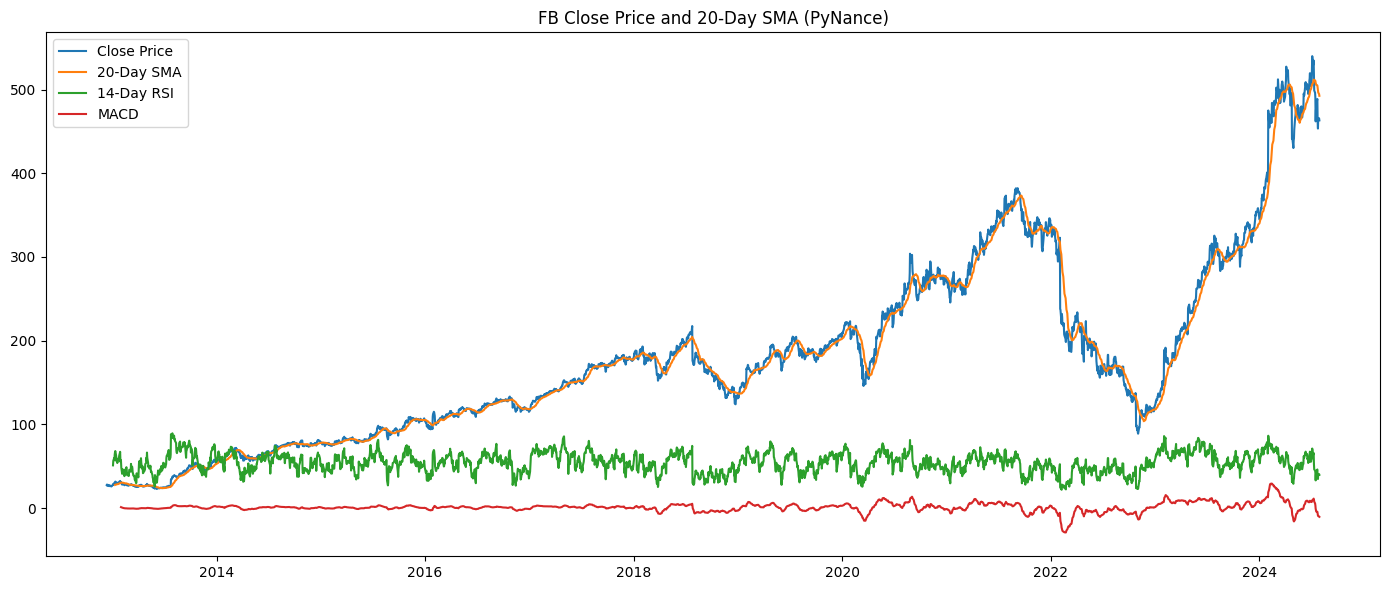

        Unnamed: 0                                           headline  \
473873      476431  As Expected: Fed Keeps Rates Unchanged and For...   
473874      476432  Facebook, Snap Analyst Projects Q2 Revenue Ups...   
473875      476433  Tech Stocks And FAANGS Strong Again To Start D...   
473876      476434  Big Tech Reaches New Record Heights At The Sto...   
473877      476435  Twitter, Square Will Mark Juneteenth As Holida...   

                                                      url          publisher  \
473873  https://www.benzinga.com/news/20/06/16226512/a...         JJ Kinahan   
473874  https://www.benzinga.com/analyst-ratings/analy...   Shanthi Rexaline   
473875  https://www.benzinga.com/government/20/06/1622...         JJ Kinahan   
473876  https://www.benzinga.com/news/20/06/16218615/b...      Neer Varshney   
473877  https://www.benzinga.com/news/20/06/16218441/t...  Shivdeep Dhaliwal   

                            date stock  neg    neu    pos  compound  
473873 202

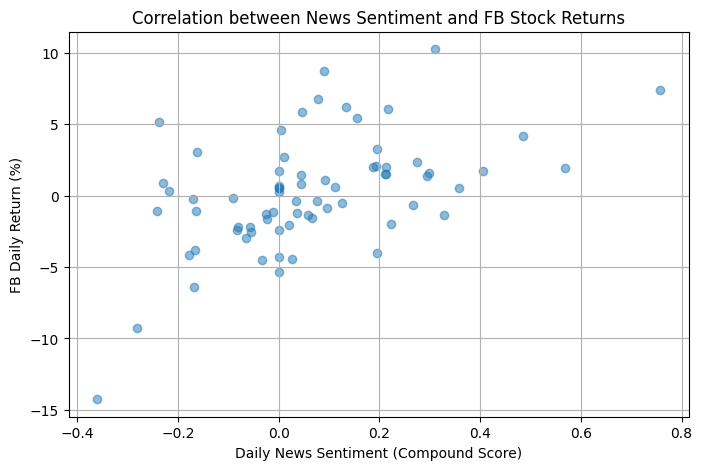

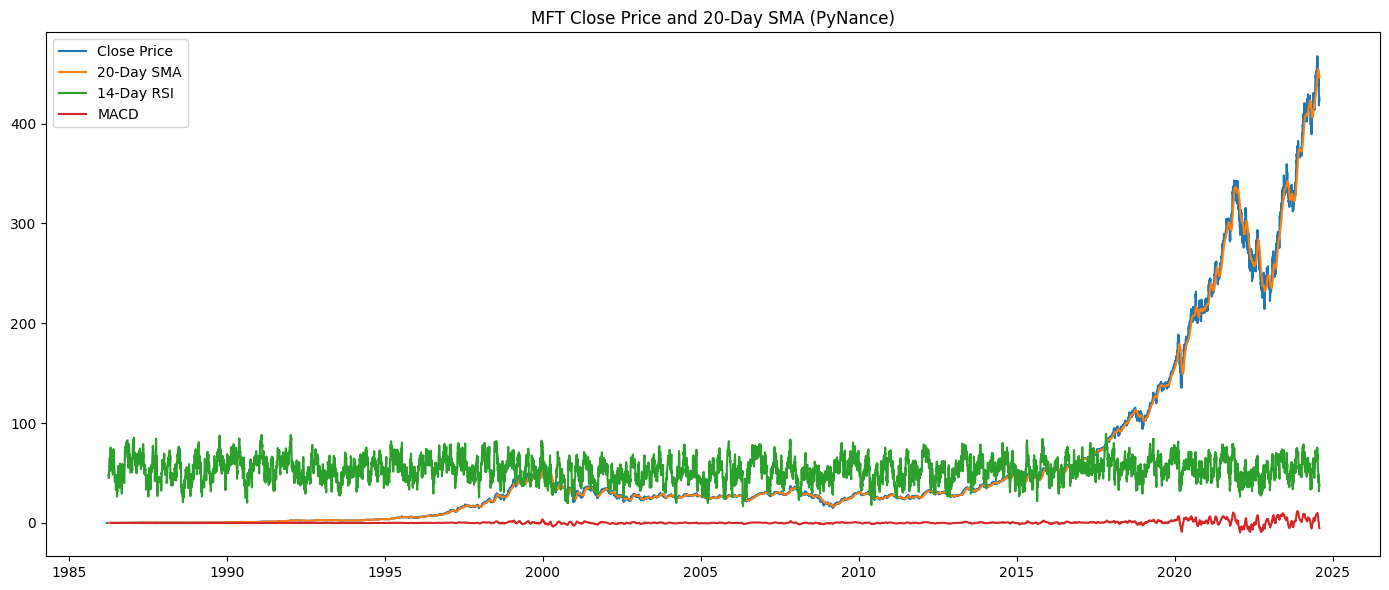

        Unnamed: 0                                           headline  \
818022      822236           Stocks That Hit 52-Week Lows On Thursday   
818023      822237         Stocks That Hit 52-Week Highs On Wednesday   
818024      822238  Stocks Which Set New 52-Week Low Yesterday, Oc...   
818025      822239  Stocks Which Set New 52-Week Low Yesterday, Oc...   
818026      822240  Stocks Which Set New 52-Week Low Friday, Octob...   

                                                      url          publisher  \
818022  https://www.benzinga.com/news/20/03/15607641/s...         Lisa Levin   
818023  https://www.benzinga.com/news/20/02/15313600/s...         Lisa Levin   
818024  https://www.benzinga.com/trading-ideas/technic...  Benzinga Newsdesk   
818025  https://www.benzinga.com/trading-ideas/technic...  Benzinga Newsdesk   
818026  https://www.benzinga.com/trading-ideas/technic...  Benzinga Newsdesk   

                            date stock    neg    neu  pos  compound  
818022 202

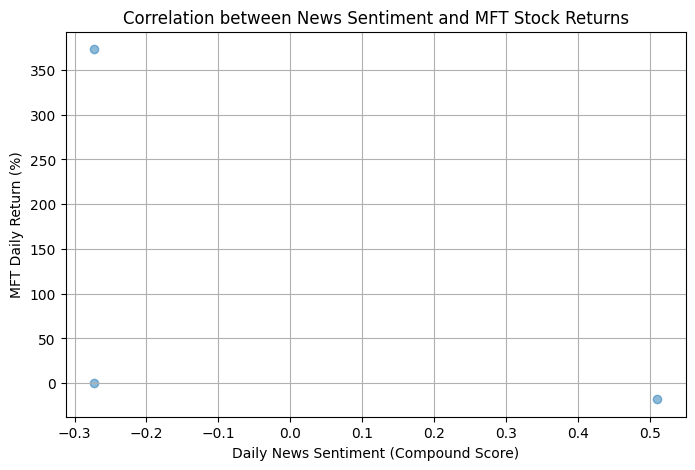

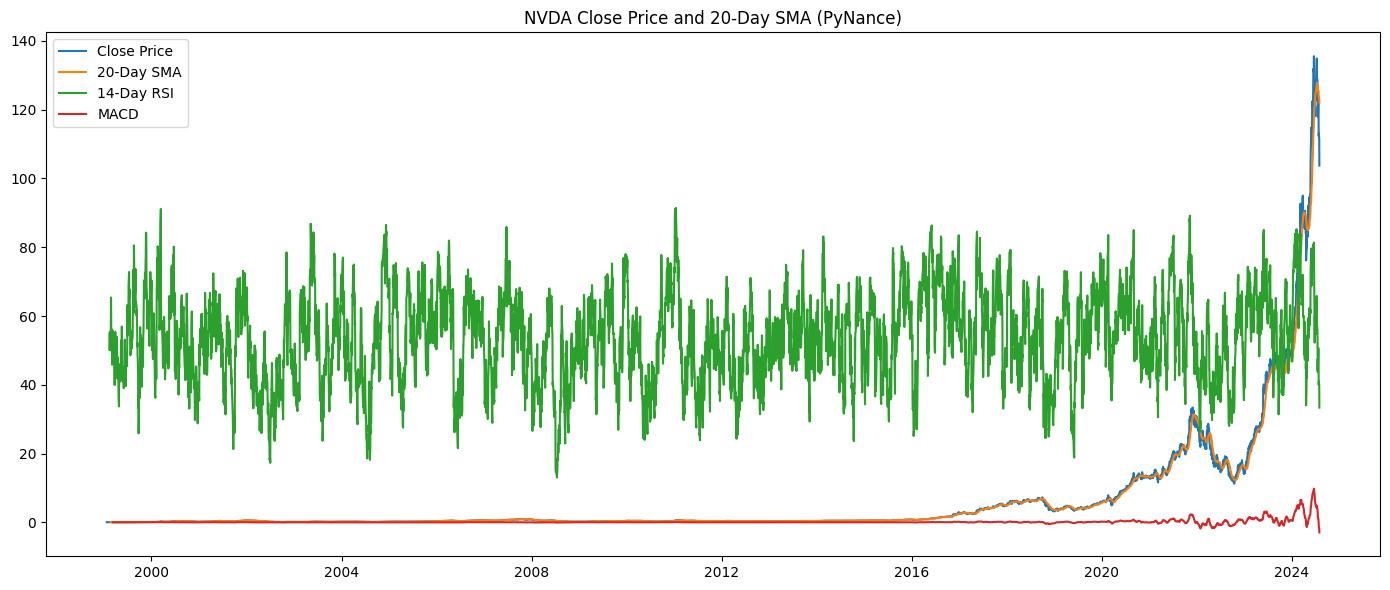

        Unnamed: 0                                           headline  \
924271      929039  Shares of several technology companies are tra...   
924272      929040                Afternoon Market Stats in 5 Minutes   
924273      929041                  Morning Market Stats in 5 Minutes   
924274      929042  Shares of several technology companies are tra...   
924275      929043                Afternoon Market Stats in 5 Minutes   

                                                      url          publisher  \
924271  https://www.benzinga.com/wiim/20/06/16224173/s...  Benzinga Newsdesk   
924272  https://www.benzinga.com/markets/20/06/1622357...  Benzinga Insights   
924273  https://www.benzinga.com/markets/20/06/1622174...  Benzinga Insights   
924274  https://www.benzinga.com/wiim/20/06/16214789/s...  Benzinga Newsdesk   
924275  https://www.benzinga.com/markets/20/06/1620319...  Benzinga Insights   

                            date stock  neg    neu    pos  compound  
924271 202

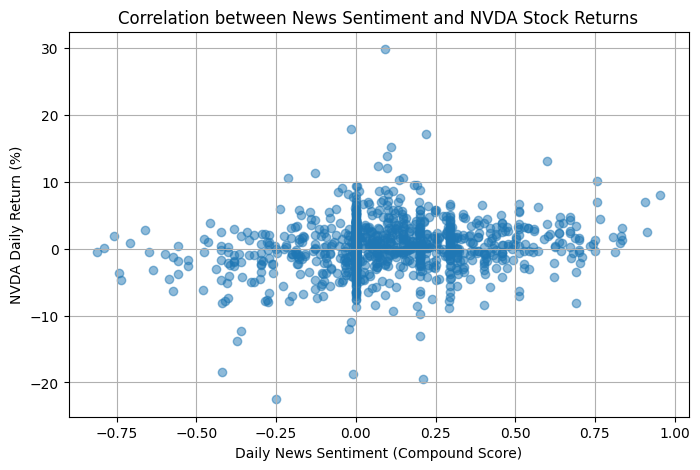

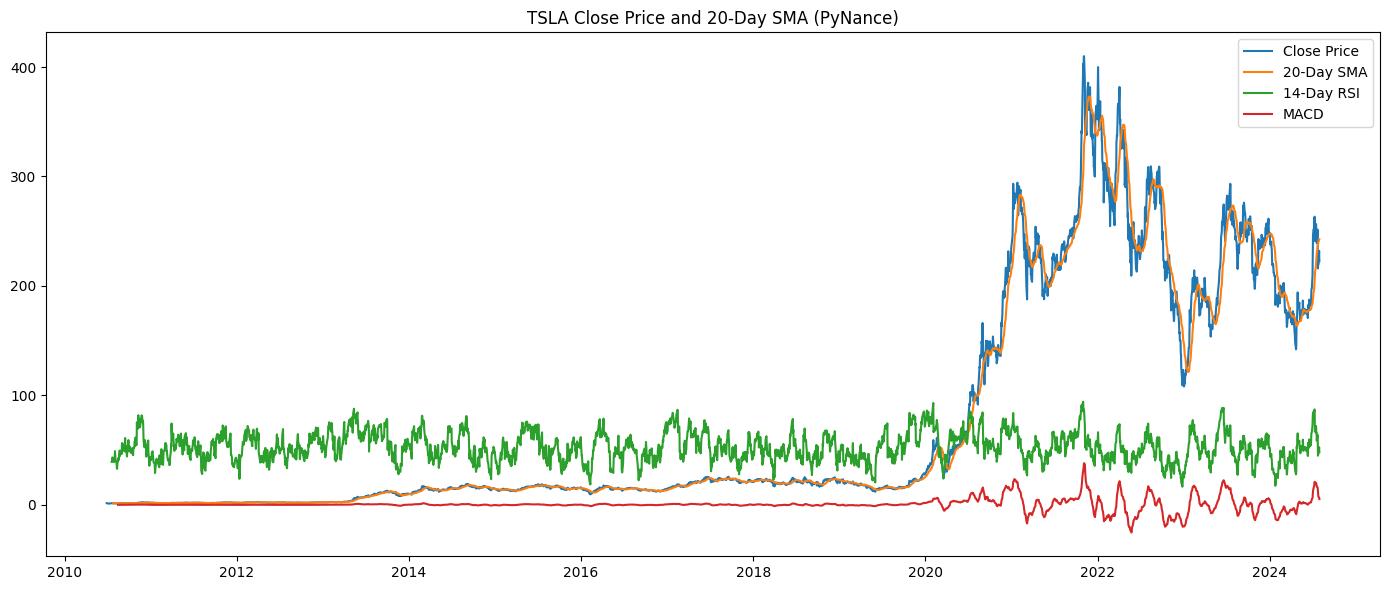

         Unnamed: 0                                           headline  \
1255221     1261140  Tesla's Stock Closes At All-Time High As Musk ...   
1255222     1261141  'Tesla factory workplace safety is 5% better t...   
1255223     1261142  'Tesla hacker unlocks Performance upgrade and ...   
1255224     1261143  GM On Track To Spend $20B On EV And AV Develop...   
1255225     1261144                  Tesla's Journey To $1,000 In 2020   

                                                       url          publisher  \
1255221  https://www.benzinga.com/news/20/06/16225150/t...        Drew Levine   
1255222  https://www.benzinga.com/news/20/06/16225621/t...  Benzinga Newsdesk   
1255223  https://www.benzinga.com/news/20/06/16224205/t...  Benzinga Newsdesk   
1255224  https://www.benzinga.com/news/20/06/16223414/g...  Benzinga Newsdesk   
1255225  https://www.benzinga.com/news/20/06/16222035/t...       Wayne Duggan   

                             date stock  neg    neu    pos  compound

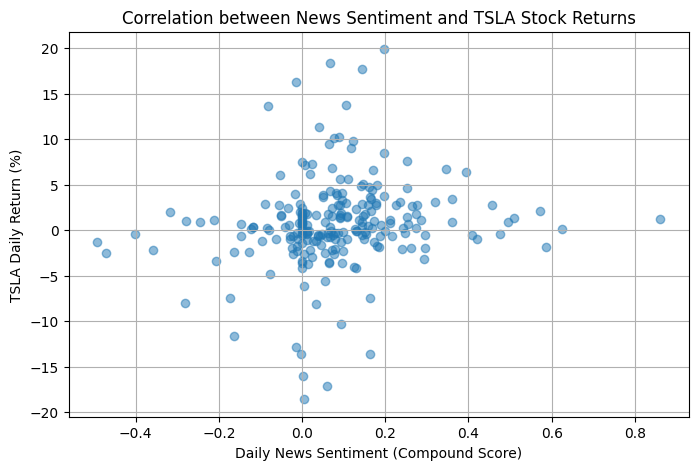

In [12]:
import sys
import os
sys.path.append('../src')
from sentiment import Sentiment
from finanical_statement import FinancialSentimentAnalyzer
from finanical_analysis import FinanicalAnalysis
from data import Data
stock_paths = ['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 'GOOG_historical_data.csv', 'META_historical_data.csv', 'MSFT_historical_data.csv', 'NVDA_historical_data.csv', 'TSLA_historical_data.csv']
tickers = ['AAPL', 'AMZN', 'GOOG','FB','MFT', 'NVDA', 'TSLA']
sentement = Sentiment('../data/raw_analyst_ratings.csv')
for ticker in tickers:
    data = Data(f'../data/yfinance_data/{ticker}_historical_data.csv')
    stock_data = data.load_data()
    fa = FinanicalAnalysis(stock_data)
    stock_data = fa.technical_indicators()
    stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
    plt.figure(figsize=(14, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.plot(stock_data.index, stock_data['SMA_20'], label='20-Day SMA')
    plt.plot(stock_data.index, stock_data['RSI_14'], label='14-Day RSI')
    plt.plot(stock_data.index, stock_data['MACD'], label='MACD')
    plt.title(f'{ticker} Close Price and 20-Day SMA (PyNance)')
    plt.tight_layout()
    plt.legend()
    plt.show()
    daily_sentiment = sentement.compute_sentiment(ticker)
    fsa = FinancialSentimentAnalyzer(f'../data/yfinance_data/{ticker}_historical_data.csv', daily_sentiment, ticker)
    fsa.run_all()
